# Midterm Exam
## Each task of the exam is performed on the original images, unless the reverse is said
## At the end of the exam, you need to commit Jupiter's notebook into GitHab in the machine vision repository in a separate folder called Midterm. Each task must be commited in separate corresponding file, e.g. Task1.ipynb.

### Task 1
Apply each filter to image, specify which properties corresponds to filters

(1) corresponds to a low-pass filter in the frequency domain; (2) less than the other specified noise-canceling filters, blurs edges; (3) increases the sharpness of the image (4) works slower than the other specified noise-canceling filters; (5) is not a noise canceling filter; (6) poorly removes noise such as "salt and pepper"; (7) will destroy all lines of one pixel thickness in the image


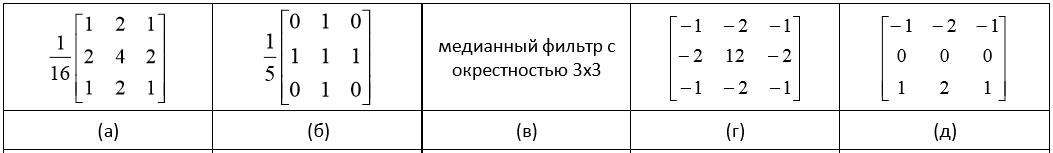

### Task 2
Construct a histogram of the brightness of the image. Apply the operation "linear stretching of brightness" and "the gray world" to the image. Operation "the gray world" needs to be realized independently. The mean can be called three times.

### Task 3
Shake the image with a noise like "salt and pepper". Suppress noise with a median filter. Map the difference between the original and noisy images, and between the adjusted and the original.

### Task 4

Apply the Canny and Sobel edge selection filters to the image. Try different options. Output the result of the selection of edges on the original color image in red.

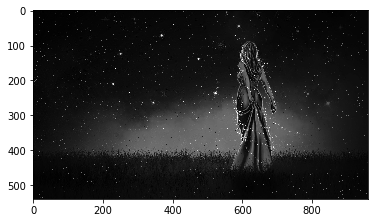

In [2]:
# Add Salt and Pepper
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as ndimg
from PIL import Image
import math
from skimage import data
from skimage import feature

def addSaltAndPepper(image):
    output = np.zeros(image.shape,np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < 0.005:
                output[i][j] = 30
            elif rdn > 0.995:
                output[i][j] = 110
            else:
                output[i][j] = image[i][j]
    return output

im = cv2.imread('b.jpg',0)
nim = addSaltAndPepper(im)

plt.imshow(nim, cmap='gray')
plt.show()



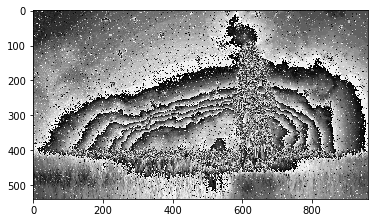

In [67]:
#TASK 1

# a - 1 6 6
# b - 1 2 6 
# v - 4 1
# g - 3 1 6
# d - 7

from scipy import ndimage as ndimg
boxcore = np.array([[1,2,1],
                    [2,4,2],
                    [1,2,1]])
#boxcore = (9/16) * boxcore
box = ndimg.convolve(nim, boxcore)
plt.imshow(box, cmap='gray')
plt.show()

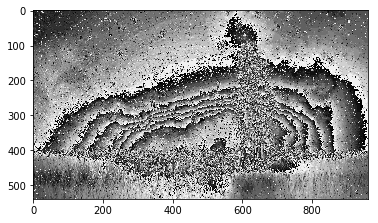

In [68]:
from scipy import ndimage as ndimg
boxcore = np.array([[-1,2,-1],
                    [2,12,2],
                    [-1,2,-1]])
#boxcore = 9 * boxcore
box = ndimg.convolve(nim, boxcore)
plt.imshow(box, cmap='gray')
plt.show()

In [ ]:
from scipy import ndimage as ndimg
boxcore = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
boxcore = (9/5) * boxcore
box = ndimg.convolve(nim, boxcore)
plt.imshow(box, cmap='gray')
plt.show()

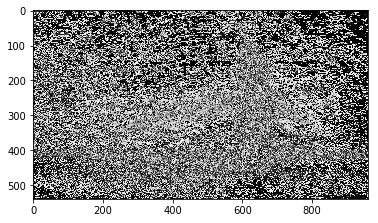

In [64]:
from scipy import ndimage as ndimg
boxcore = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])
boxcore = 9 * boxcore
box = ndimg.convolve(nim, boxcore)
plt.imshow(box, cmap='gray')
plt.show()

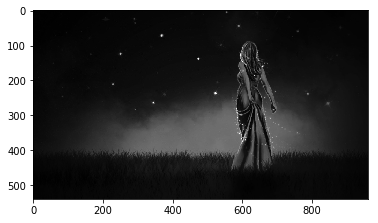

In [66]:
from scipy.ndimage.filters import median_filter
med = median_filter(nim, size=3)
plt.imshow(med, cmap='gray')
plt.show()

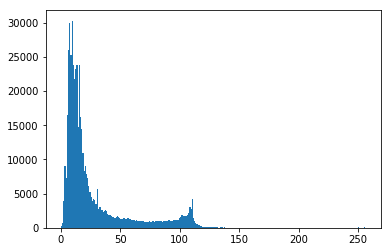

In [70]:
#TASK 2
plt.hist(nim.ravel(),256,[0,256]); plt.show()

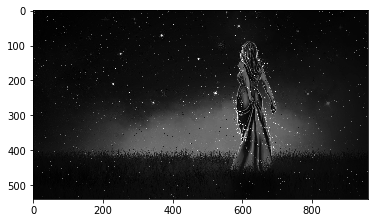

In [80]:
maxVal = nim.max();
minVal = nim.min();
nim2 = addSaltAndPepper(im)
#nim2 = (nim2 - minVal) * (255/(maxVal - minVal)); 
nim2 = nim2 * 1.7
plt.imshow(nim2, cmap='gray')
plt.show()


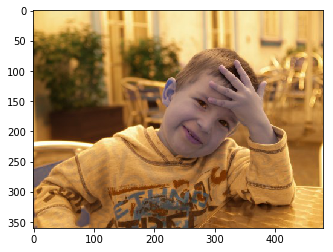

In [87]:
# Gray World
bad = cv2.imread('bad.jpg')
plt.imshow(bad)
plt.show()

In [ ]:
r = 

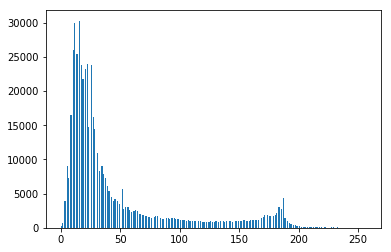

In [81]:
plt.hist(nim2.ravel(),256,[0,256]); plt.show()

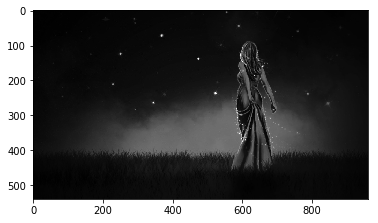

In [82]:
#Task 3
nim3 = nim - med
plt.imshow(med, cmap='gray')
plt.show()

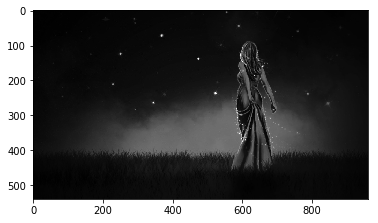

In [83]:
# Task4
canny = feature.canny(nim, sigma=1)
plt.imshow(med, cmap='gray')
plt.show()

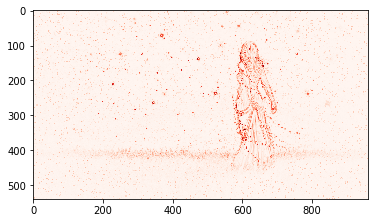

In [3]:
from skimage.filters import sobel
sobel = sobel(nim)
plt.imshow(sobel, cmap = 'Reds')
plt.show()